In [35]:
import requests
import zipfile
import numpy as np
import io
import pandas as pd

In [36]:
df = pd.read_csv('../data/ml_features.csv')
df.set_index('date', inplace= True)
df.index = pd.to_datetime(df.index)
day_ahead = df['da_prices']
real_time = df['rt_prices']
rtda = df['price_error']

In [37]:
rtda[:100].index

DatetimeIndex(['2018-01-01 01:00:00', '2018-01-01 02:00:00',
               '2018-01-01 03:00:00', '2018-01-01 04:00:00',
               '2018-01-01 05:00:00', '2018-01-01 06:00:00',
               '2018-01-01 07:00:00', '2018-01-01 08:00:00',
               '2018-01-01 09:00:00', '2018-01-01 10:00:00',
               '2018-01-01 11:00:00', '2018-01-01 12:00:00',
               '2018-01-01 13:00:00', '2018-01-01 14:00:00',
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00',
               '2018-01-02 01:00:00', '2018-01-02 02:00:00',
               '2018-01-02 03:00:00', '2018-01-02 04:00:00',
               '2018-01-02 05:00:00', '2018-01-02 06:00:00',
               '2018-01-02 07:00:00', '2018-01-02 08:00:00',
               '2018-01-

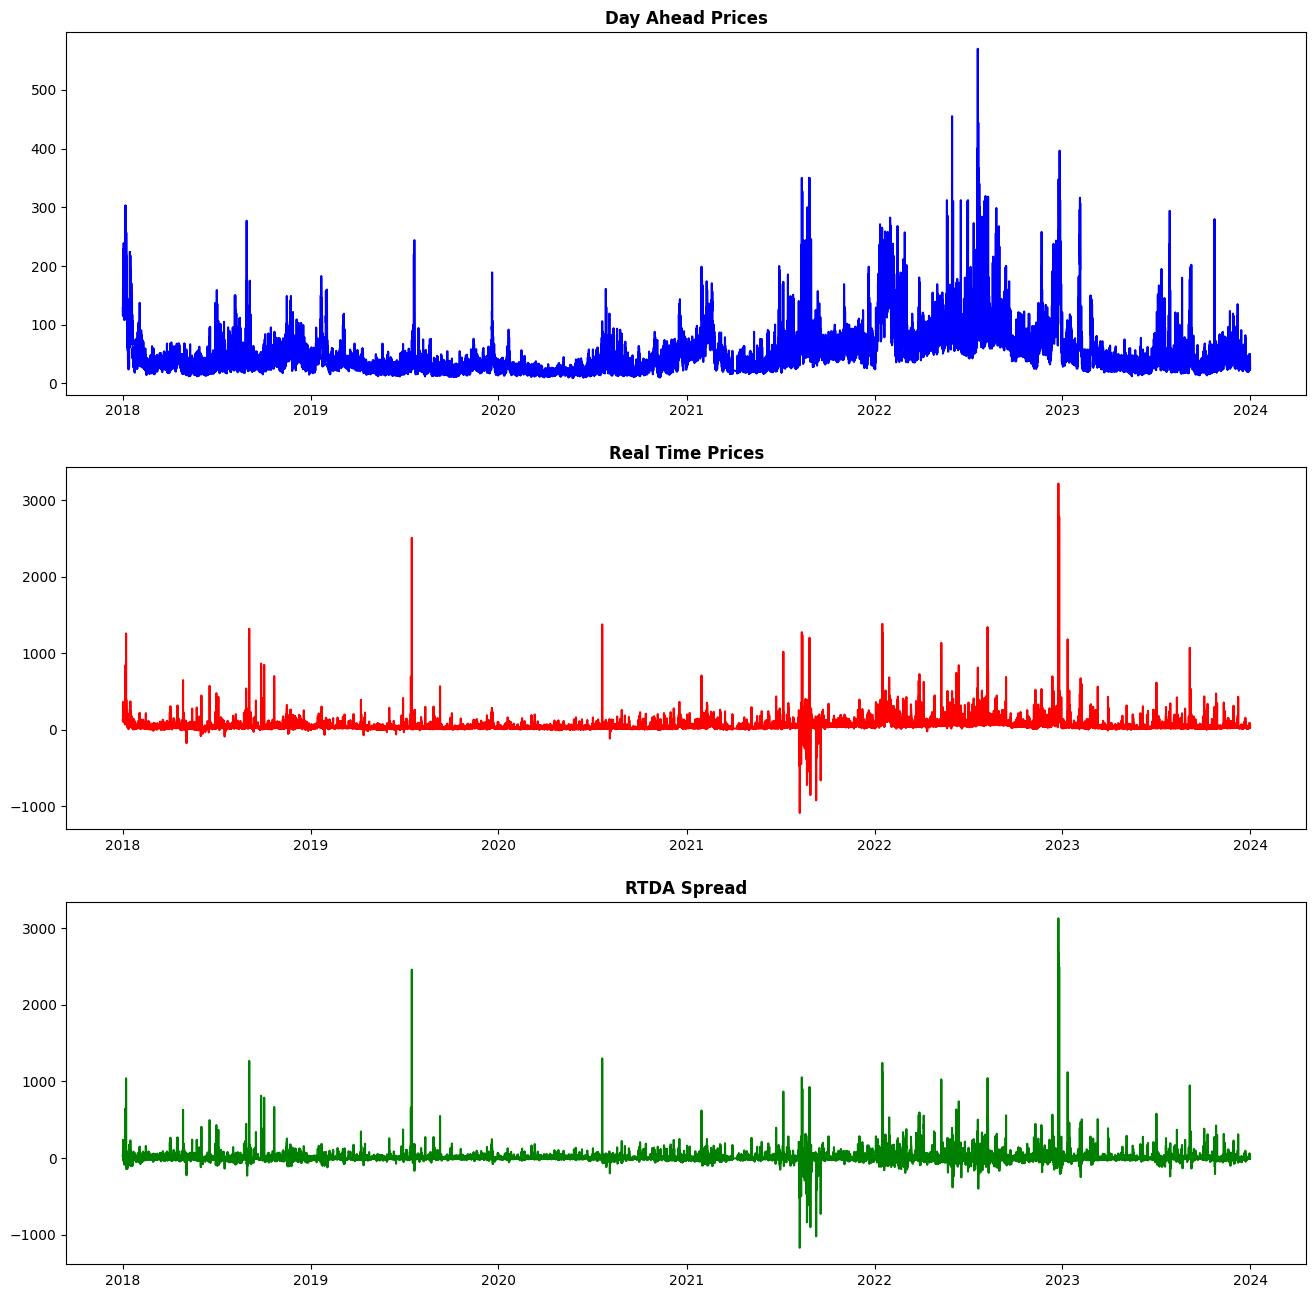

In [42]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define major ticks by year only
year_locator = mdates.YearLocator()  # tick every year
year_formatter = mdates.DateFormatter('%Y')  # format as 4-digit year

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 16))

ax1.plot(day_ahead, color='blue')
ax1.set_title('Day Ahead Prices', fontsize=12, fontweight='bold')
ax1.xaxis.set_major_locator(year_locator)
ax1.xaxis.set_major_formatter(year_formatter)

ax2.plot(real_time, color='red')
ax2.set_title('Real Time Prices', fontsize=12, fontweight='bold')
ax2.xaxis.set_major_locator(year_locator)
ax2.xaxis.set_major_formatter(year_formatter)

ax3.plot(rtda, color='green')
ax3.set_title('RTDA Spread', fontsize=12, fontweight='bold')
ax3.xaxis.set_major_locator(year_locator)
ax3.xaxis.set_major_formatter(year_formatter)

# Optional: rotate labels if needed
for ax in (ax1, ax2, ax3):
    ax.tick_params(axis='x', rotation=0)  # or 45 for angled labels

plt.show()


KeyError: 'LBMP ($/MWHr)'

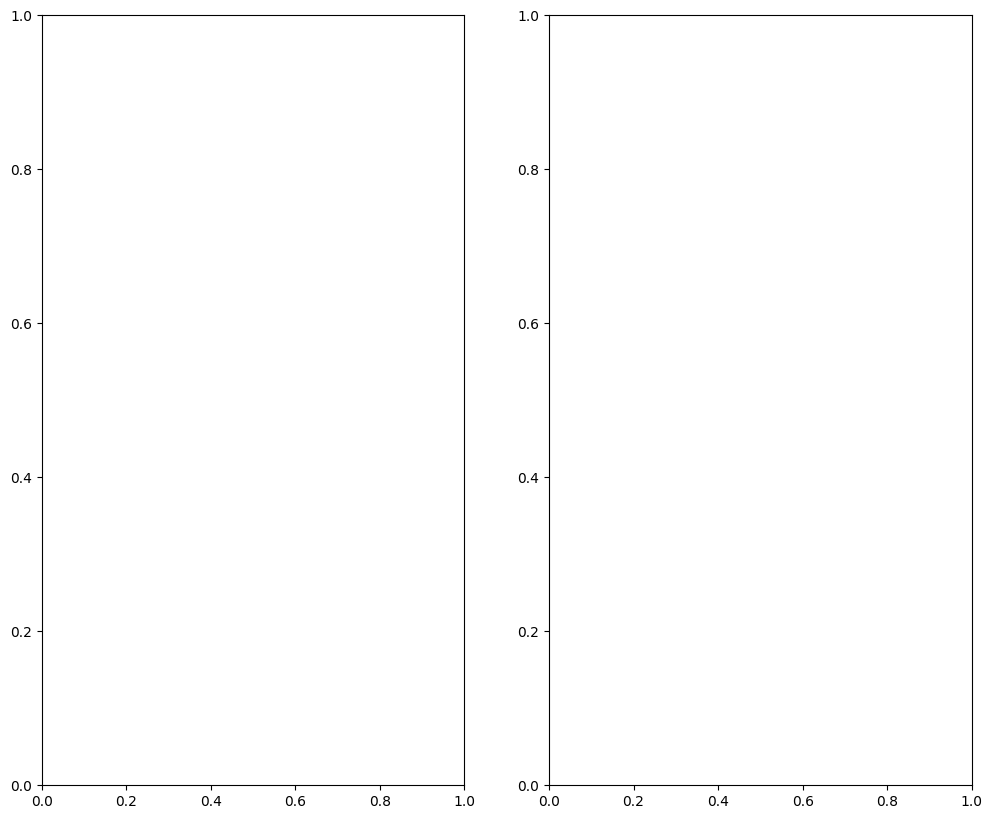

In [39]:
# Placing the plots in the plane

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
ax1.plot(real_time['LBMP ($/MWHr)'], color = 'red', label= 'Real Time')
ax1.plot(day_ahead['LBMP ($/MWHr)'], color = 'blue', label= 'Day Ahead')
ax1.set_title('DA & RT Prices')
ax1.legend()

ax2.plot(day_ahead['LBMP ($/MWHr)'] - real_time['LBMP ($/MWHr)'], color = 'green', label= 'DART Spread')
ax2.set_title('DART Spread Prices')

plt.show()

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        3.000e+00, 7.000e+00, 6.000e+00, 1.200e+01, 8.000e+00, 3.300e+01,
        8.300e+01, 3.370e+02, 7.626e+03, 6.060e+02, 3.900e+01, 6.000e+00,
        4.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([-1051.72133333, -1000.55169   ,  -949.38204667,  -898.21240333,
         -847.04276   ,  -795.87311667,  -744.70347333,  -693.53383   ,
         -642.36418667,  -591.19454333,  -540.0249    ,  -488.85525667,
         -437.68561333,  -386.51597   ,  -335.34632667,  -284.17668333,
         -233.00704   ,  -181.83739667,  -130.66775333,   -79.49811   ,
          -28.32

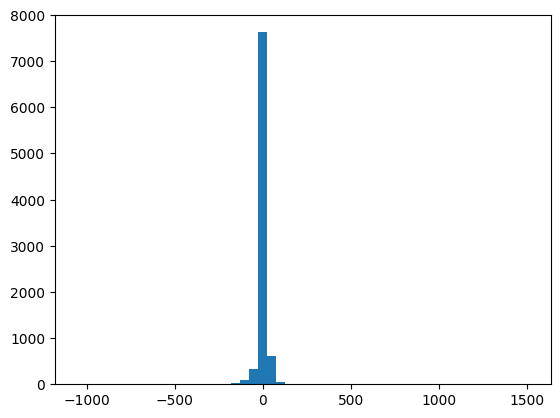

In [ ]:
dart_spread = day_ahead['LBMP ($/MWHr)'] - real_time['LBMP ($/MWHr)']
data = np.array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
                 0.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
                 3.000e+00, 7.000e+00, 6.000e+00, 1.200e+01, 8.000e+00, 3.300e+01,
                 8.300e+01, 3.370e+02, 7.626e+03, 6.060e+02, 3.900e+01, 6.000e+00,
                 4.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
                 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
                 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
                 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
                 0.000e+00, 1.000e+00])

# Define custom bins
bins = np.concatenate([
    np.linspace(0, 10, 21),         # fine bins near 0 (0.5 spacing)
    np.linspace(10, 100, 10),       # medium bins
    np.linspace(100, 8000, 15)      # coarse bins
])
plt.hist(dart_spread, bins= 50)